## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/clean_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,Phoenix,15.100000,95.918703,4.430000,0.0,9.0,Fall,Saturday,True,10.522170
1,1.725682e+09,91.734965,74.131674,81.955263,89.681314,72.873155,81.210889,58.941119,52.842540,0.011439,...,San Antonio,19.191581,81.950567,4.645604,0.0,9.0,Fall,Saturday,True,10.696207
2,1.725633e+09,73.020798,63.374293,69.004546,72.695585,62.750551,70.625700,61.300470,78.168719,0.397894,...,New York City,11.262321,70.531166,3.338991,0.0,9.0,Fall,Saturday,True,9.847901
3,1.725692e+09,85.000000,72.900000,78.600000,87.800000,72.900000,79.700000,68.400000,72.300000,0.000000,...,San Diego,12.100000,80.977666,3.100000,0.0,9.0,Fall,Saturday,True,10.339067
4,1.725716e+09,103.299529,74.192719,85.794578,102.627719,75.289962,84.954969,62.446751,48.213253,-0.005730,...,Los Angeles,28.359220,88.397179,2.505916,0.0,9.0,Fall,Saturday,True,9.928193


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['Health_Risk_Score'],axis=1)

In [5]:
X.head()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,source,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,comb,Phoenix,15.100000,95.918703,4.430000,0.0,9.0,Fall,Saturday,True
1,1.725682e+09,91.734965,74.131674,81.955263,89.681314,72.873155,81.210889,58.941119,52.842540,0.011439,...,comb,San Antonio,19.191581,81.950567,4.645604,0.0,9.0,Fall,Saturday,True
2,1.725633e+09,73.020798,63.374293,69.004546,72.695585,62.750551,70.625700,61.300470,78.168719,0.397894,...,comb,New York City,11.262321,70.531166,3.338991,0.0,9.0,Fall,Saturday,True
3,1.725692e+09,85.000000,72.900000,78.600000,87.800000,72.900000,79.700000,68.400000,72.300000,0.000000,...,comb,San Diego,12.100000,80.977666,3.100000,0.0,9.0,Fall,Saturday,True
4,1.725716e+09,103.299529,74.192719,85.794578,102.627719,75.289962,84.954969,62.446751,48.213253,-0.005730,...,comb,Los Angeles,28.359220,88.397179,2.505916,0.0,9.0,Fall,Saturday,True


In [6]:
y = df['Health_Risk_Score']

In [7]:
y

0      10.522170
1      10.696207
2       9.847901
3      10.339067
4       9.928193
         ...    
995    10.115997
996     9.121788
997     9.193803
998    10.110408
999    10.772682
Name: Health_Risk_Score, Length: 1000, dtype: float64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 367)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 367), (200, 367))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
df.isnull().sum().sort_values(ascending=False)

datetimeEpoch        0
tempmax              0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week          0
Is_Weekend           0
uvindex              0
solarenergy          0
solarradiation       0
precipprob           0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipcover          0
visibility           0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover           0
Health_Risk

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0553
- Mean Absolute Error: 0.0424
- R2 Score: 0.9934
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0743
- Mean Absolute Error: 0.0584
- R2 Score: 0.9878


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.6807
- Mean Absolute Error: 0.5734
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6742
- Mean Absolute Error: 0.5630
- R2 Score: -0.0017


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0704
- Mean Absolute Error: 0.0538
- R2 Score: 0.9893
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0876
- Mean Absolute Error: 0.0678
- R2 Score: 0.9831


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0735
- Mean Absolute Error: 0.0526
- R2 Score: 0.9883
----------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.987844
2,Ridge,0.983099
7,CatBoosting Regressor,0.982198
3,K-Neighbors Regressor,0.973436
5,Random Forest Regressor,0.972758
6,XGBRegressor,0.972470
4,Decision Tree,0.951197
8,AdaBoost Regressor,0.913963
1,Lasso,-0.001682


## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.78


## Plot y_pred and y_test

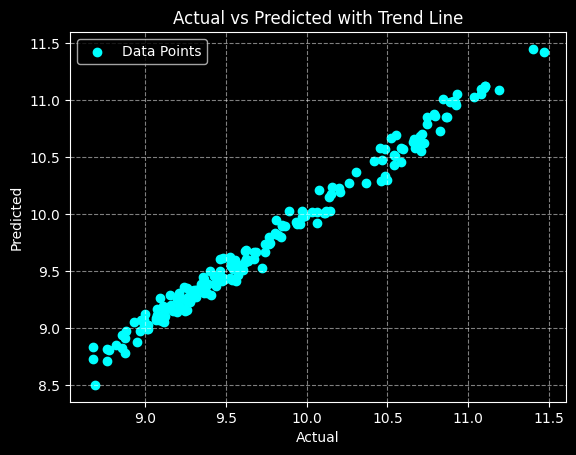

In [18]:
plt.style.use('dark_background')

plt.scatter(y_test, y_pred, c='cyan', label='Data Points') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with Trend Line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


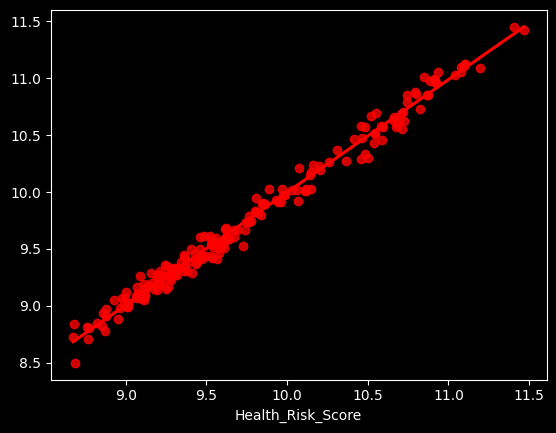

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,8.772366,8.803619,-0.031252
737,9.254320,9.235721,0.018599
740,8.965360,8.976849,-0.011488
660,9.299142,9.331203,-0.032061
411,9.725827,9.523732,0.202095
...,...,...,...
408,9.597397,9.521455,0.075942
332,8.677958,8.835952,-0.157994
208,9.615948,9.677420,-0.061472
613,10.711753,10.551978,0.159776
